___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# K Means Color Quantization

### Imports


In [14]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [15]:
image_as_array = mpimg.imread('palm_trees.jpg')

In [16]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

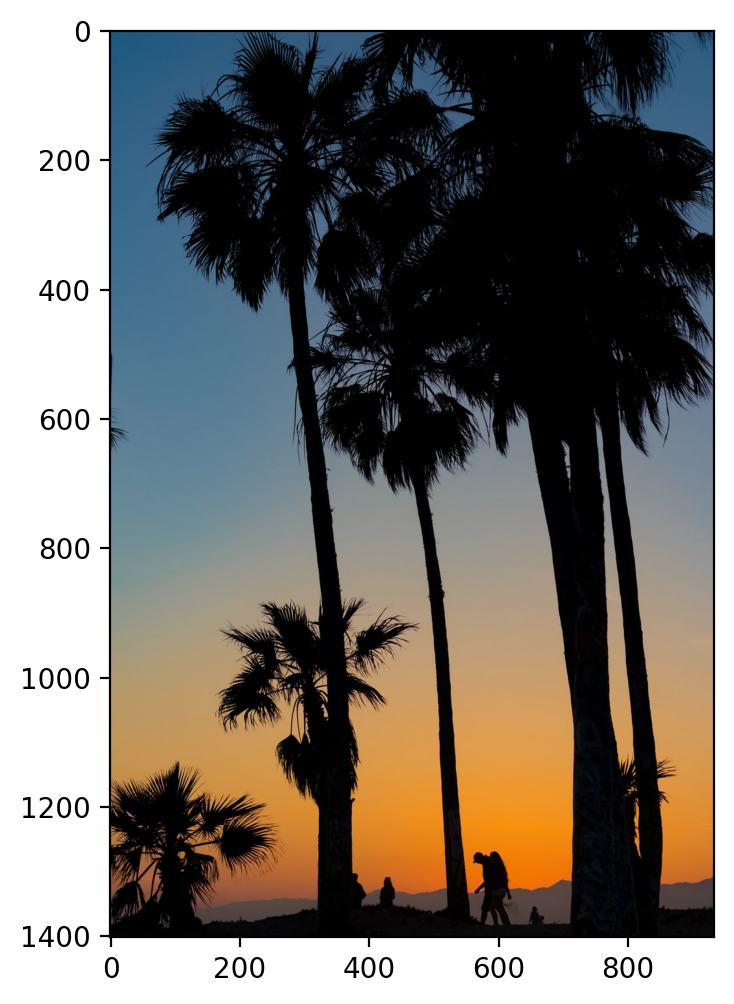

In [17]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [18]:
image_as_array.shape
# (h,w,3 color channels)

(1401, 934, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [19]:
(h,w,c) = image_as_array.shape

In [20]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [21]:
from sklearn.cluster import KMeans

In [22]:
model = KMeans(n_clusters=6)

In [23]:
model

KMeans(n_clusters=6)

In [24]:
labels = model.fit_predict(image_as_array2d)

In [25]:
labels

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [32]:
# THESE ARE THE 6 RGB COLOR CODES!
model.cluster_centers_

array([[  2.77058309,   2.57124563,   3.68132513],
       [218.9928282 , 135.65641108,  47.38332267],
       [191.31149013, 154.49773586, 109.7555489 ],
       [ 71.33451588, 109.28411433, 137.56015178],
       [ 67.35721379,  61.68101759,  61.9510675 ],
       [136.82331401, 143.76282594, 143.89456654]])

In [33]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [34]:
rgb_codes

array([[  3,   3,   4],
       [219, 136,  47],
       [191, 154, 110],
       [ 71, 109, 138],
       [ 67,  62,  62],
       [137, 144, 144]])

In [35]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [38]:
quantized_image.shape

(1401, 934, 3)

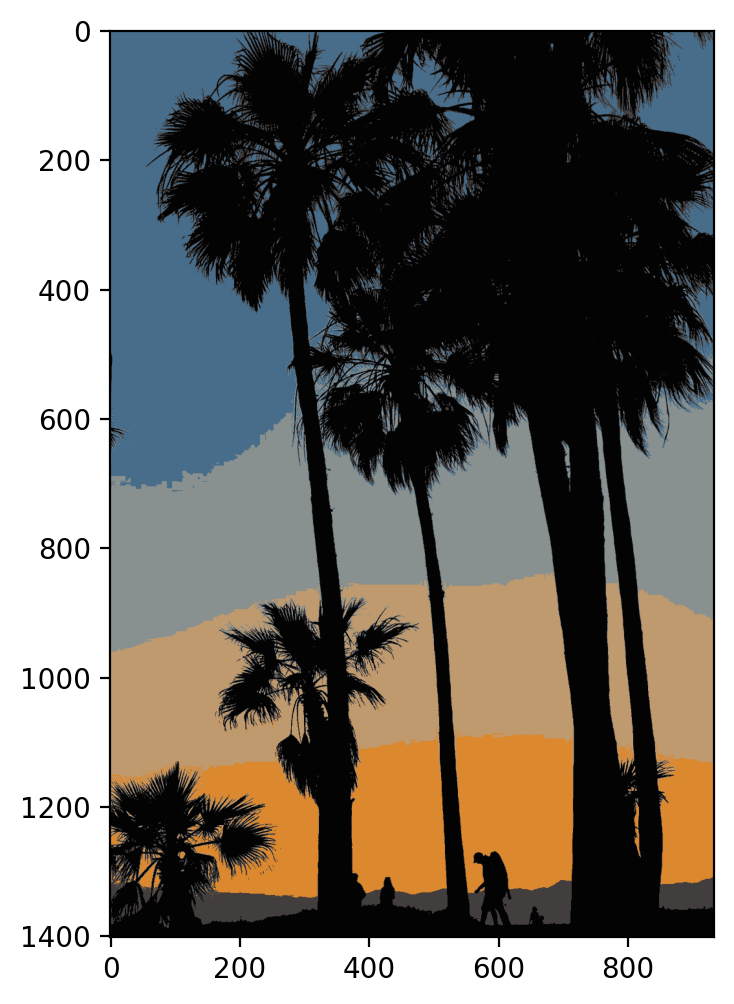

In [39]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)